# Visualizing the Relationships Between Quantitative Features

So far we've looked at the distribution of single features, the distribution of two categorical features, and how to visualize differences between groups.  In this lesson we'll discuss how to look at the relationships between two quantitative features.  

## Healthcare Dataset:

How do personal features like age, BMI, smoking status, diet and exercise effect how much you pay for healthcare? Do older people, in general, pay more for healthcare?  How do other factors like BMI and smoking effect your healthcare costs?  We'll find the answers to these questions in this lesson.

Let's import pandas, matplotlib and seaborn and read in the data.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('assets/healthcare_data.csv')

df.head()

,Age,Smoker,BMI,ExerciseFrequency,DietQuality,HealthcareExpenses
0,50,No,32.4,3.9,7.2,6889.13
1,38,Yes,27.4,0.0,5.1,8201.14
2,50,No,21.7,1.8,7.8,5273.34
3,32,No,21.6,3.7,9.2,3683.89
4,23,No,30.3,5.2,4.1,3099.13


In this lesson, we are looking at the relationships between quantitative features.  Which three features are quantitative and continuous?  

The classic figure for examining the relationship between two quantitative features is called a scatterplot.  You've probably made them before.  We graph the value of one feature on the x-axis and the value of the other feature on the y-axis.  The pattern formed by the data tells us about the relationship between the two features.

To start, we are going to graph the relationship between age (on the x-axis) and healthcare charges (on the y-axis).

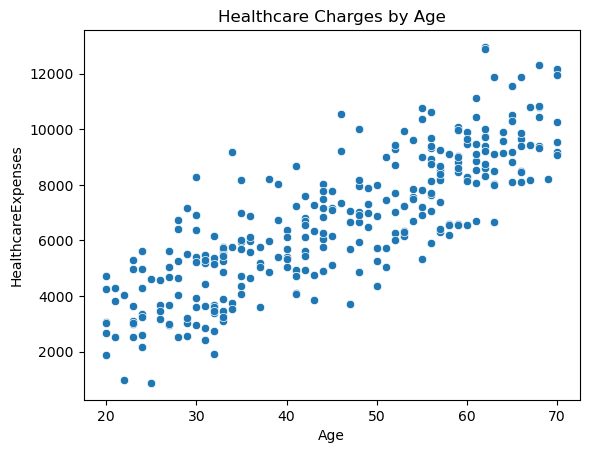

In [23]:
#Scatterplot of age vs healthcare charges
sns.scatterplot(x='Age', y='HealthcareExpenses', data=df)
plt.title('Healthcare Charges by Age')
plt.show()

In general, we see that healthcare chargest tend to increase as people get older.  However, that relationship isn't perfect.  There's a lot of varibility in how much individuals of the same age pay for healthcare.

Because the data points fall roughly in a line, we can represent the relationship between the two features with a linear model.  You'll talk a lot more about exactly how this works - how the model is fit to the data,how to tell if it's a good model or not - in the machine learning course.

Let's see if we can figure out what other features in our data might explain some of this variability.

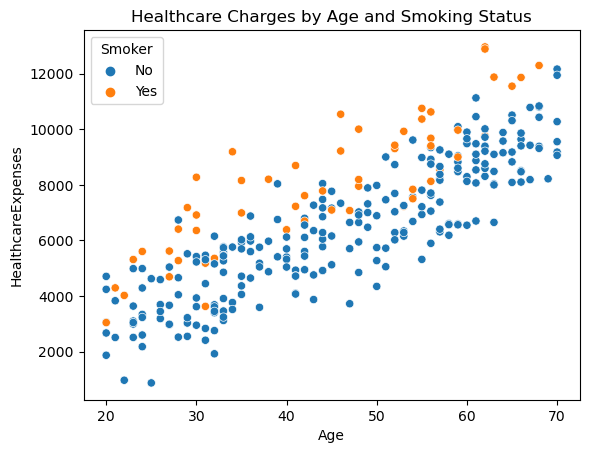

In [24]:
#Scatterplot of age vs healthcare charges with regression line
sns.scatterplot(x='Age', y='HealthcareExpenses', data=df, hue="Smoker")
plt.title('Healthcare Charges by Age and Smoking Status')
plt.show()

Smokers seem to have consistently higher healthcare charges than nonsmokers.  What about BMI?

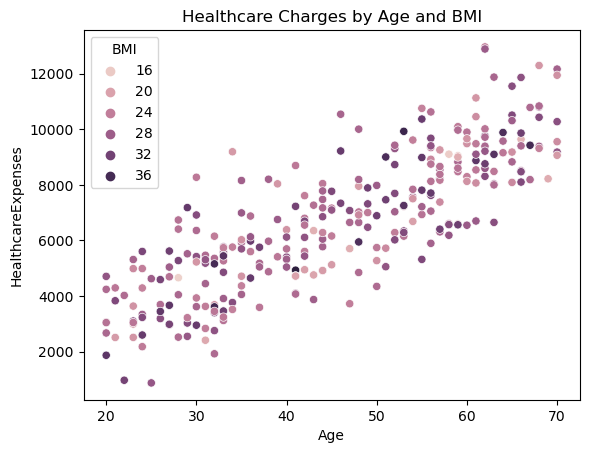

In [25]:
#Scatterplot with BMI continuous

sns.scatterplot(x='Age', y='HealthcareExpenses', data=df, hue="BMI")
plt.title('Healthcare Charges by Age and BMI')
plt.show()

It looks like there's a mix of people with different BMIs all throughout the data.  What if we categorize BMI?

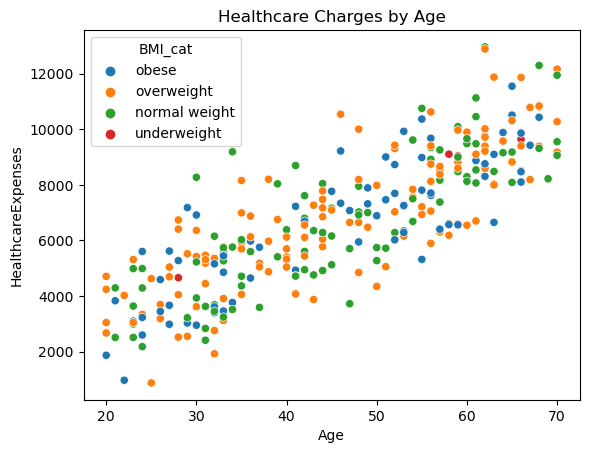

In [26]:
df['BMI_cat'] = 'underweight'
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 25), 'BMI_cat'] = 'normal weight'
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 30), 'BMI_cat'] = 'overweight'
df.loc[df['BMI'] >= 30, 'BMI_cat'] = 'obese'


sns.scatterplot(x='Age', y='HealthcareExpenses', hue='BMI_cat', data=df)
plt.title('Healthcare Charges by Age')
plt.show()

Nope - not really!

## Modeling

But we're just running on vibes.  How can we make this more rigorous?

In data science, we are often interested in developing a model of our data.  A model is a mathematical representation of the general relationship present in our data.  

**If the pattern of our data is roughly a line (either in the positive or negative direction) we can represent our data using a line - aka a linear model - aka linear regression.**  Because our data is clearly in three different groups, it makes sense to represent our data using three lines rather than one.  

You'll learn much more about the ins and outs of this procedure, known as linear regression, in the machine learning course.  For now, it's enough to see a visual representation of using a model to summarize the relationship of age to healthcare costs for each group.  

**Ideally your linear regression line should run right through the middle of your data, crossing as many points as possible.  There should be an approximately equal number of points above and below the regression line.**

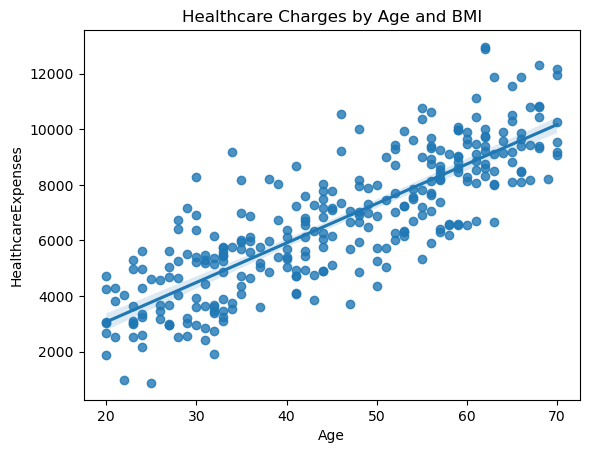

In [27]:
# Regplot allows us to plot a regression line. 

sns.regplot(x='Age', y='HealthcareExpenses', data=df)
plt.title('Healthcare Charges by Age and BMI')
plt.show()

We couldn't use this model to perfectly predict the healthcare costs for an individual at a specific age.  However, if you were a healthcare economist, it could give you a ballpark figure how how much you expect costs to go up as people age depending on if they were at a low, medium or high claim risk.

In the words of the famous statistician George Box (who is different from the boxplot guy, John Tukey):

**"All models are wrong, but some are useful."**

## But how exactly do we determine if this model is a good fit or not?

We generally measure model fit with something called R-squared.  R-squared ranges from 0 - 1 (sometimes represented from 0 % - 100 %).  There are no strict rules for what makes a "good" R-squared or a "bad" R-squared (more vibes) but the closer you get to 1 (or 100%) the better the model fits.

The definition of R-squared is "The percent of variability in the data that is explained by the model."  Having 100% of your data explained by the model is a good thing.

**You are going to learn a different way to do this calculation in the next class.  That's okay.  Sometimes there's more than one way to do something.  The interpretation of R-squared in both cases is the same.**

In [28]:
import statsmodels.api as sm

X = sm.add_constant(df['Age'])
y = df['HealthcareExpenses']

model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HealthcareExpenses   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     645.6
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.45e-76
Time:                        10:39:59   Log-Likelihood:                -2592.7
No. Observations:                 300   AIC:                             5189.
Df Residuals:                     298   BIC:                             5197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        228.2692    266.064      0.858      0.392    -295.334     751.873
Age          142.0002      5.589     25.408      0.000     131.002     152.999
==============================================================================
Omnibus:                        5.373   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.307
Skew:                           0.326   Prob(JB):                       0.0704
Kurtosis:                       3.018   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Is the model improved if we add in smoking?

In [29]:
df['Smoker'] = df['Smoker'].map({'Yes': 1, 'No': 0})

X = sm.add_constant(df[['Age', 'Smoker']])
y = df['HealthcareExpenses']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HealthcareExpenses   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     527.4
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.84e-98
Time:                        10:39:59   Log-Likelihood:                -2538.3
No. Observations:                 300   AIC:                             5083.
Df Residuals:                     297   BIC:                             5094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -234.6253    225.970     -1.038      0.300    -679.330     210.079
Age          144.2934      4.674     30.874      0.000     135.096     153.491
Smoker      1956.5330    171.651     11.398      0.000    1618.727    2294.339
==============================================================================
Omnibus:                        5.728   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                3.499
Skew:                          -0.019   Prob(JB):                        0.174
Kurtosis:                       2.472   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What about BMI?

In [30]:

X = sm.add_constant(df[['Age', 'BMI']])
y = df['HealthcareExpenses']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HealthcareExpenses   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     321.8
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           4.54e-75
Time:                        10:39:59   Log-Likelihood:                -2592.7
No. Observations:                 300   AIC:                             5191.
Df Residuals:                     297   BIC:                             5202.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.3257    602.391      0.198      0.843   -1066.170    1304.822
Age          142.0575      5.605     25.345      0.000     131.027     153.088
BMI            3.9534     19.604      0.202      0.840     -34.627      42.534
==============================================================================
Omnibus:                        5.447   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.373
Skew:                           0.328   Prob(JB):                       0.0681
Kurtosis:                       3.026   Cond. No.                         411.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What about Exercise Frequency and Diet Quality?

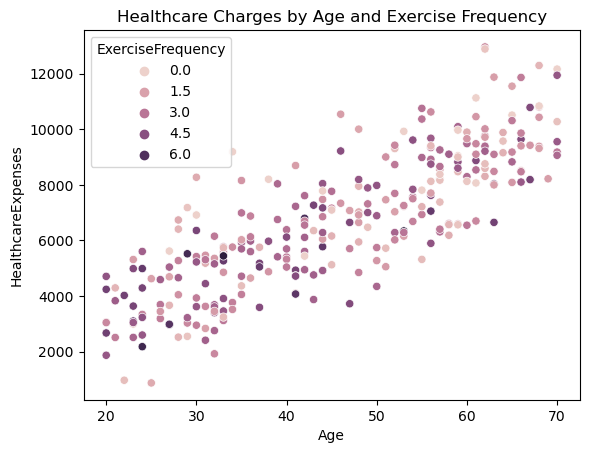

In [31]:
sns.scatterplot(x='Age', y='HealthcareExpenses', data=df, hue="ExerciseFrequency")
plt.title('Healthcare Charges by Age and Exercise Frequency')
plt.show()

In [32]:
X = sm.add_constant(df[['Age', 'ExerciseFrequency']])
y = df['HealthcareExpenses']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HealthcareExpenses   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     331.2
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           2.35e-76
Time:                        10:40:00   Log-Likelihood:                -2589.7
No. Observations:                 300   AIC:                             5185.
Df Residuals:                     297   BIC:                             5196.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               702.4090    327.013      2.148      0.033      58.854    1345.964
Age                 138.8810      5.686     24.425      0.000     127.691     150.071
ExerciseFrequency  -125.6763     51.206     -2.454      0.015    -226.449     -24.904
==============================================================================
Omnibus:                        2.938   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.995
Skew:                           0.236   Prob(JB):                        0.224
Kurtosis:                       2.872   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

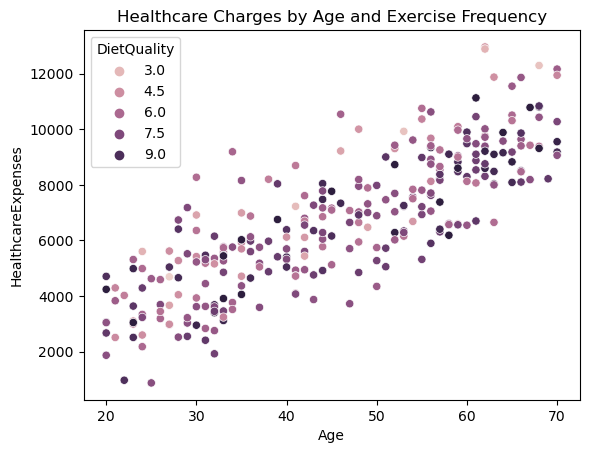

In [33]:
sns.scatterplot(x='Age', y='HealthcareExpenses', data=df, hue="DietQuality")
plt.title('Healthcare Charges by Age and Exercise Frequency')
plt.show()

In [34]:
X = sm.add_constant(df[['Age', 'DietQuality']])
y = df['HealthcareExpenses']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HealthcareExpenses   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     346.2
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           2.49e-78
Time:                        10:40:00   Log-Likelihood:                -2585.1
No. Observations:                 300   AIC:                             5176.
Df Residuals:                     297   BIC:                             5187.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1351.0861    386.195      3.498      0.001     591.060    2111.112
Age           144.9098      5.508     26.309      0.000     134.070     155.750
DietQuality  -177.8658     45.259     -3.930      0.000    -266.935     -88.797
==============================================================================
Omnibus:                        2.526   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                2.604
Skew:                           0.207   Prob(JB):                        0.272
Kurtosis:                       2.809   Cond. No.                         240.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X = sm.add_constant(df[['Age', 'Smoker','BMI', 'ExerciseFrequency', 'DietQuality']])
y = df['HealthcareExpenses']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HealthcareExpenses   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     208.9
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.60e-94
Time:                        10:40:00   Log-Likelihood:                -2538.2
No. Observations:                 300   AIC:                             5088.
Df Residuals:                     294   BIC:                             5111.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -266.0844    622.685     -0.427      0.669   -1491.569     959.400
Age                 144.0537      4.883     29.499      0.000     134.443     153.664
Smoker             1977.8442    195.525     10.116      0.000    1593.039    2362.650
BMI                  -1.5393     16.476     -0.093      0.926     -33.966      30.887
ExerciseFrequency    -1.8521     44.814     -0.041      0.967     -90.049      86.345
DietQuality          12.0111     43.100      0.279      0.781     -72.813      96.836
==============================================================================
Omnibus:                        5.840   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.555
Skew:                          -0.027   Prob(JB):                        0.169
Kurtosis:                       2.469   Cond. No.                         514.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## When is a line not a good fit for the data?

Linear models are a powerful data analysis tool.  They do a great job in a lot of situations.  However, it's important to be on the lookout for times when a linear model is a poor fit for your data.  Making a visualization is often the easiest way to check for model fit issues ahead of time.

A linear model is not a good fit for your data if:

**1. Your data is made up of more than one distinct group.**

One single line won't do a good job capturing the relationships for the individual groups.  Here the regression line passes through almost none of the points.

<Axes: xlabel='Experience', ylabel='Salary'>

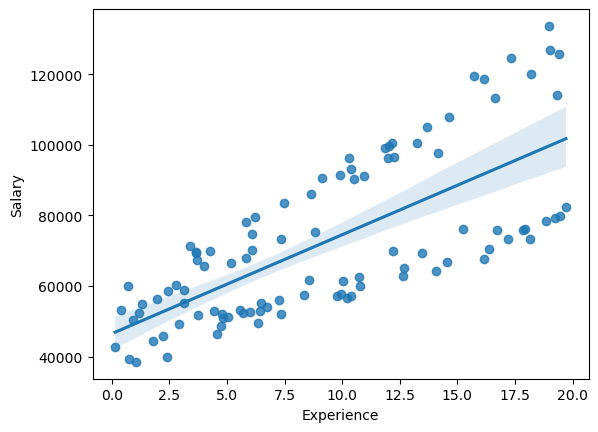

In [36]:
salary_df = pd.read_csv('assets/salary_experience_industry.csv')

sns.regplot(x='Experience', y='Salary', data=salary_df)


**2. When there are outliers that fall far outside the normal range of the data.**

Here's an example plotting the relationship of age and fare paid in the Titanic data.  See those two people who were a little younger than 40 and paid 500 pounds for their tickets?  Those are outliers.  This model doesn't fit well because there are way more points above the line than below it, and there are big outliers at the top of the figure.

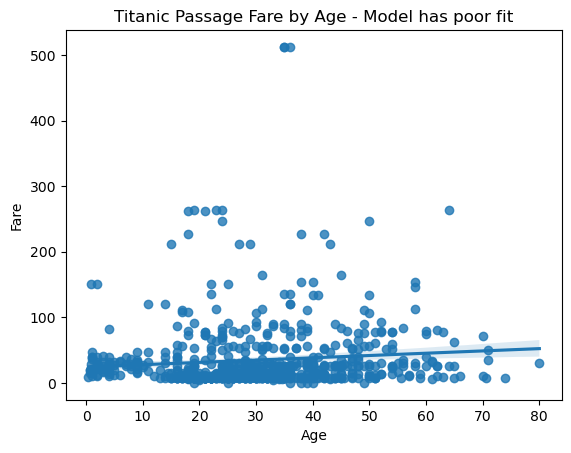

In [37]:
#Plotting the Titanic data
titanic_df = pd.read_csv('assets/titanic_passengers.csv')

sns.regplot(x='Age', y='Fare', data=titanic_df)

plt.title('Titanic Passage Fare by Age - Model has poor fit')
plt.show()

**3. When there is a curved rather than linear relationship in the data.**

Here is a plot of the cumulative revenue each week the film was showing.  You can see that the relationship of cumulative revenue to the number of weeks the film had been shown is curved rather than a straight line.  There are mathematical ways to transform a curved relationship into a straight line relationship, but we might not know one is present if we don't visualize the data.


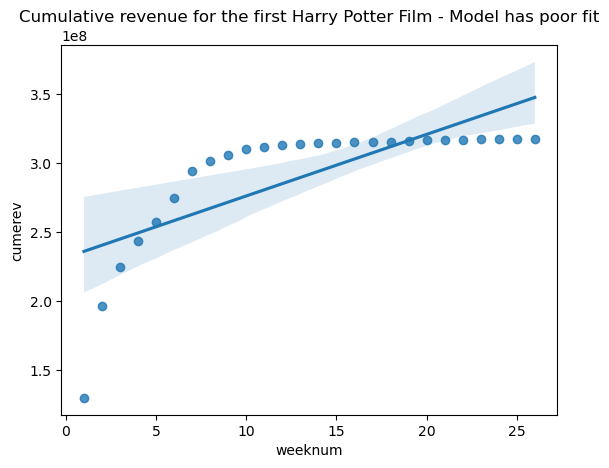

In [38]:
#Plotting the cumulative revenue of the first Harry Potter film

movie_df = pd.read_csv('assets/harrypotter.csv', encoding='ISO-8859-1')

sns.regplot(x='weeknum', y='cumerev', data=movie_df.loc[movie_df['film']==1])
plt.title('Cumulative revenue for the first Harry Potter Film - Model has poor fit')
plt.show()

# How to tackle nonlinear relationships

This is something you'll dig into in much more detail in the machine learning class, but it's possible to model the relationship between two features with a non-linear relationship.
Often this involves some trial and error on the part of the data scientist.  In this example, we look at modeling the relationship between temperature and quality in a manufacturing process.

## Exponential Relationships

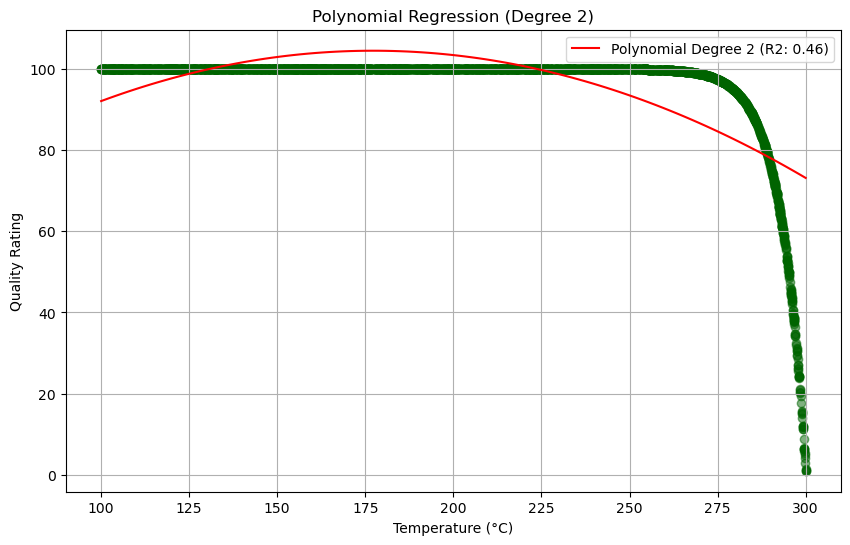

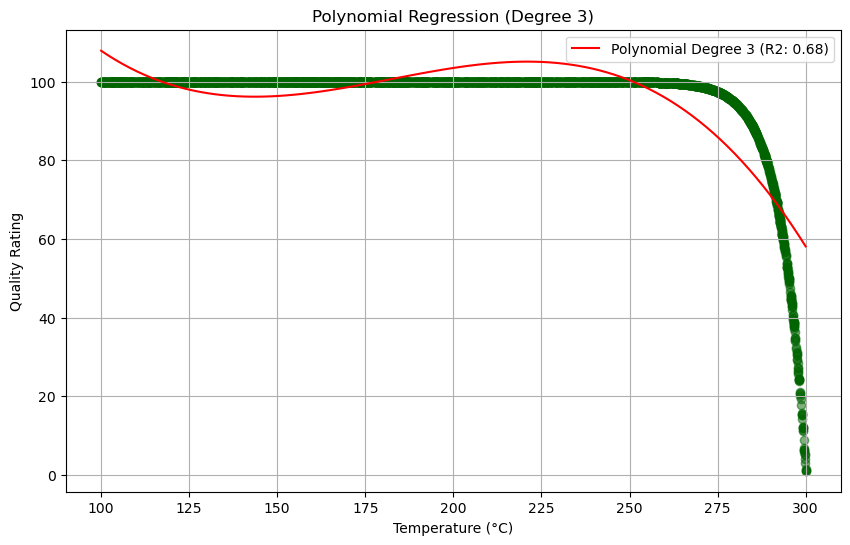

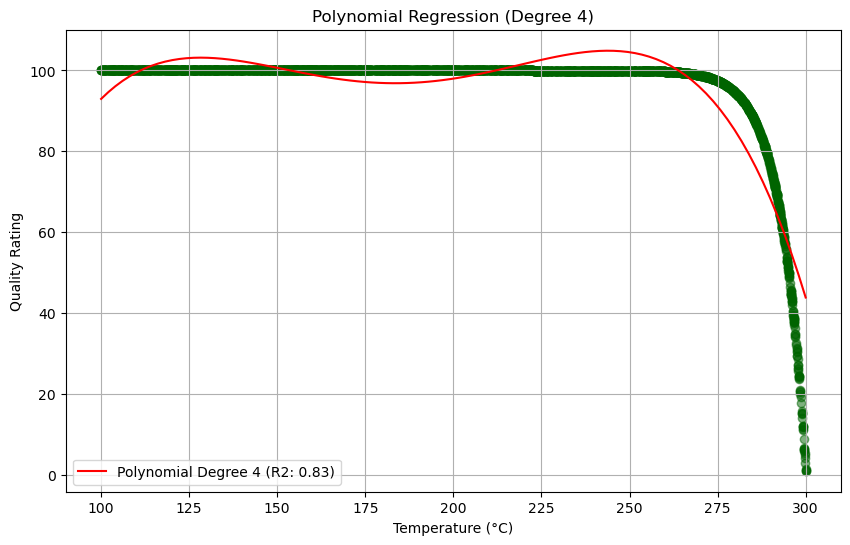

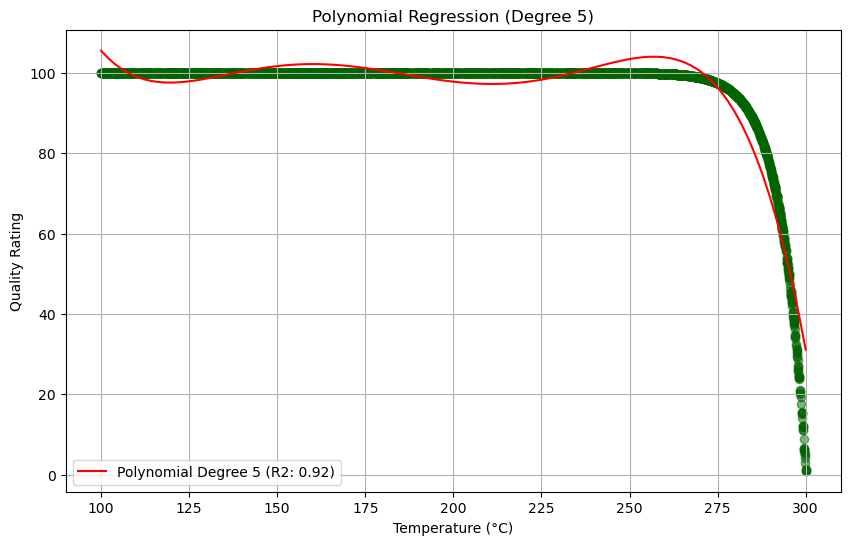

In [39]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Function to apply polynomial regression and plot results
def apply_and_plot_polynomial_regression(degree, X_train, X_test, y_train, y_test):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, alpha=0.5, color='darkgreen')
    plt.scatter(X_test, y_test, alpha=0.5, color='darkgreen')
    
    # Plot the model
    X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_fit = model.predict(poly.transform(X_fit))
    plt.plot(X_fit, y_fit, color='red', label=f'Polynomial Degree {degree} (R2: {r2:.2f})')

    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Quality Rating')
    plt.legend()
    plt.grid(True)
    plt.show()

    return r2

manufacturing_data = pd.read_csv('assets/manufacturing.csv', encoding='ISO-8859-1')
manufacturing_data.rename(columns={'Temperature (Â°C)': 'Temperature (°C)'}, inplace=True)

# Preparing the data
X = manufacturing_data[['Temperature (°C)']].values
y = manufacturing_data['Quality Rating'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply and plot polynomial regression for different degrees
degrees = [2, 3, 4, 5]
for degree in degrees:
    apply_and_plot_polynomial_regression(degree, X_train, X_test, y_train, y_test)


## Logarithmic Relationship

In this example, we look at the relationship between the carat value and cost of a diamond.

Before log transformation:

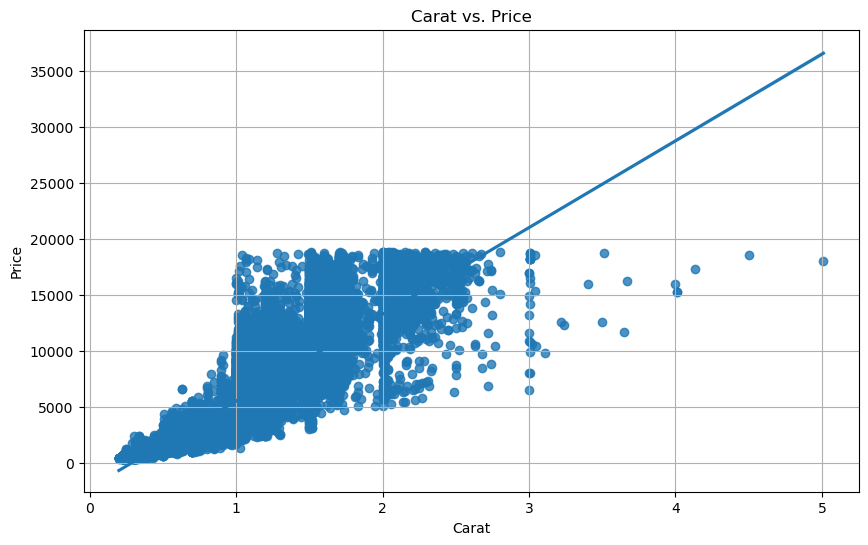

In [40]:
import numpy as np

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

plt.figure(figsize=(10, 6))
sns.regplot(x = 'carat', y='price', data=diamonds)
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Experimenting with log transformations to find the best linear relationship

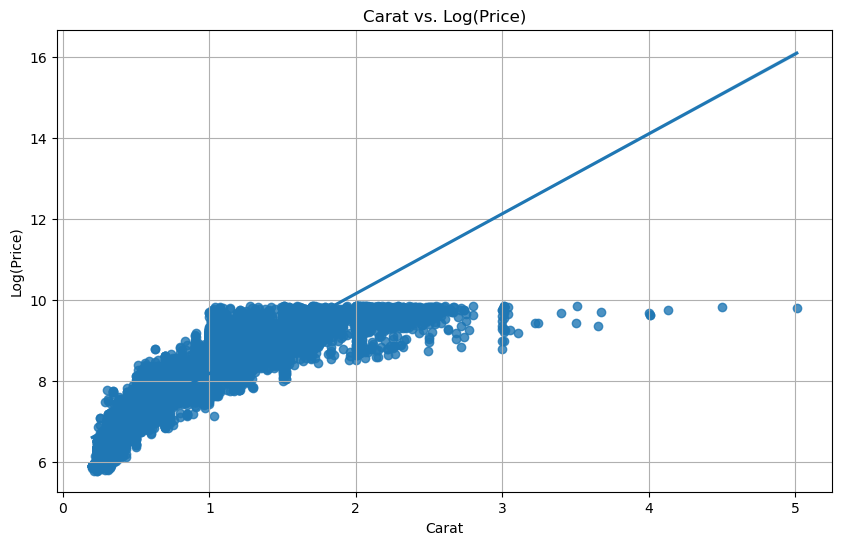

In [41]:
#Carat vs log of price

diamonds['log_carat'] = np.log(diamonds['carat'])
diamonds['log_price'] = np.log(diamonds['price'])


plt.figure(figsize=(10, 6))
sns.regplot(x = 'carat', y='log_price', data=diamonds)
plt.title('Carat vs. Log(Price)')
plt.xlabel('Carat')
plt.ylabel('Log(Price)')
plt.grid(True)
plt.show()

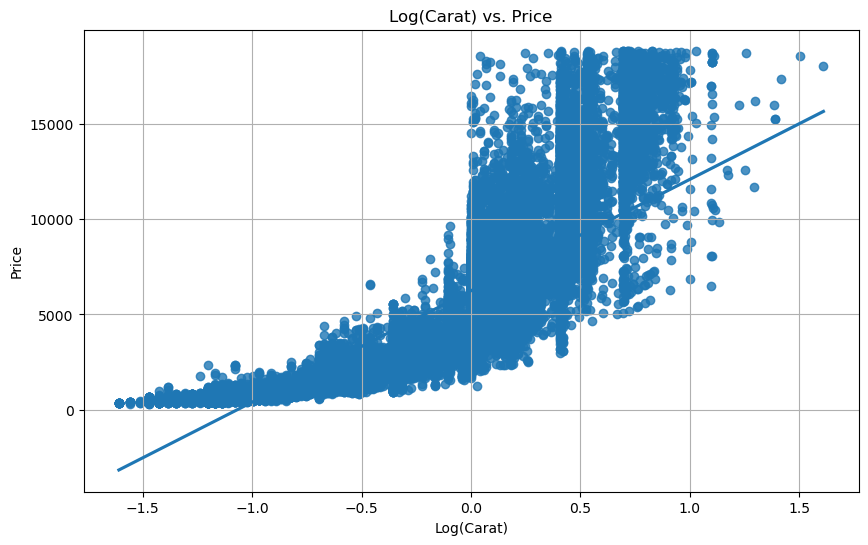

In [42]:
#Price vs log of carat

plt.figure(figsize=(10, 6))
sns.regplot(x = 'log_carat', y='price', data=diamonds)
plt.title('Log(Carat) vs. Price')
plt.xlabel('Log(Carat)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

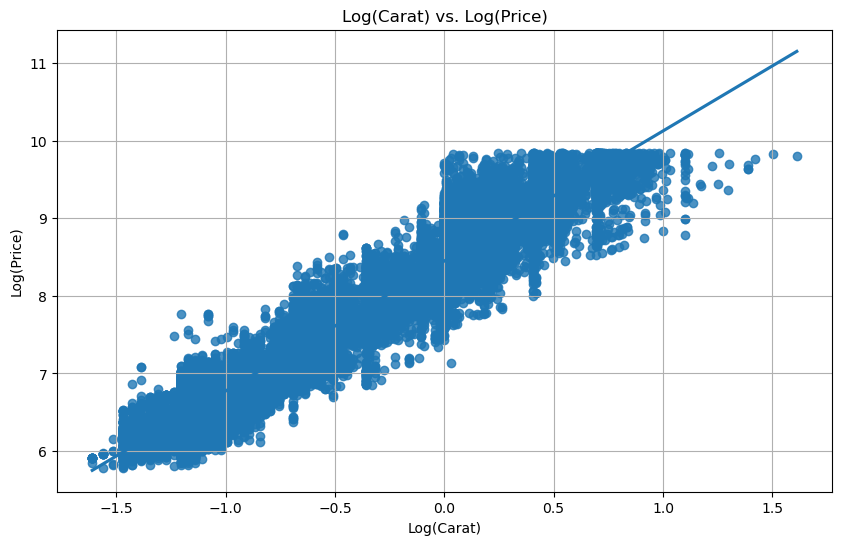

In [43]:
#Both log transformed

plt.figure(figsize=(10, 6))
sns.regplot(x = 'log_carat', y='log_price', data=diamonds)
plt.title('Log(Carat) vs. Log(Price)')
plt.xlabel('Log(Carat)')
plt.ylabel('Log(Price)')
plt.grid(True)
plt.show()

# OK
With these tools you should be able to visualize the relationship between two quantitative features and determine if other featuers in your dataset impact that relationship.  You can determine if a linear model is a good fit for the data by making a regression plot using Seaborn.